In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

In [143]:
#Reading data

#This is the original pollution dataset

#pdata = pd.read_csv('data/pollution-1.csv',parse_dates=['ReadingDateTime'])

#This is the weather dataset after extracting numerical values and downsampling

#wdata = pd.read_csv('vis/weather-1-cleaned.csv')

#This is the joined dataset of original features

cdata= pd.read_csv('vis/weather-pollution.csv',parse_dates=['DATE'])

# This is cdata with no outliers

cdata_out = pd.read_csv('vis/weather-pollution-no-outliers.csv',parse_dates=['DATE'])

#This is the final dataset with all added features before handling nulls

final  = pd.read_csv('vis/final-visualization.csv',parse_dates=['DATE'])

In [144]:
##############################  CREATE DATA VISUALISATIONS FOR ALL STEPS #################################

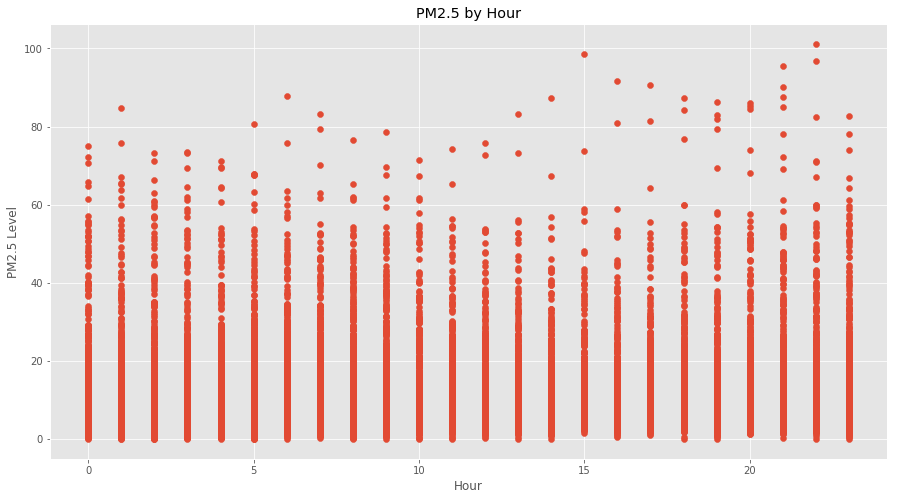

In [145]:
x=final['HOUR']
y=final['PM25']
plt.rcParams["figure.figsize"] = [15,8]
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

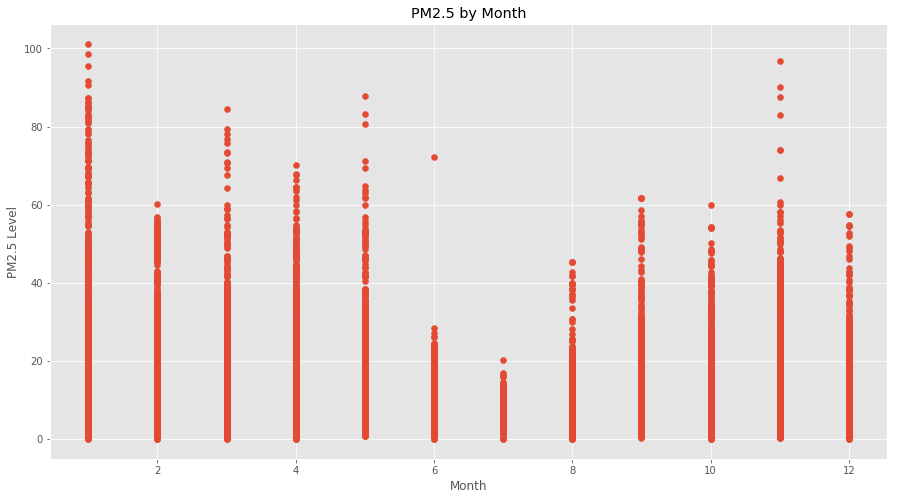

In [146]:
x=final['MONTH']
y=final['PM25']
plt.rcParams["figure.figsize"] = [15,8]
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

In [147]:
data = cdata

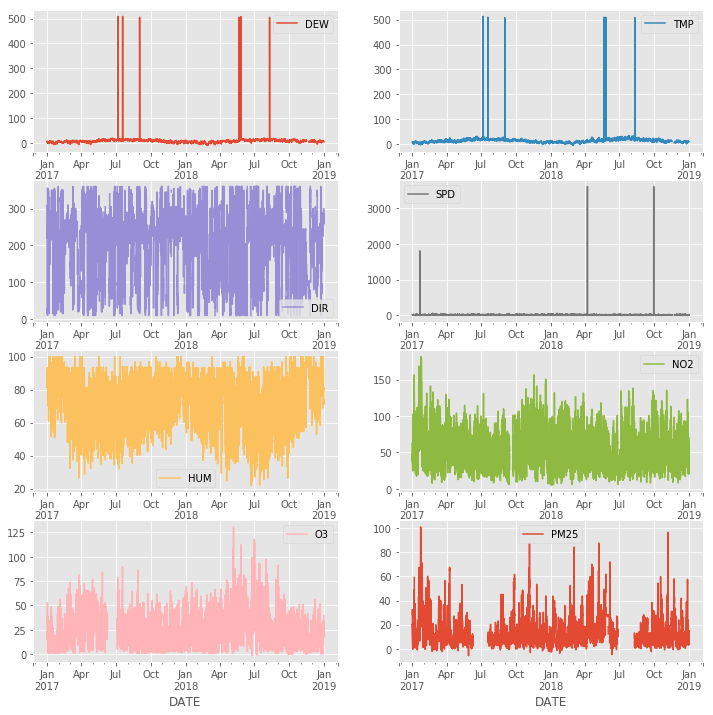

In [148]:
#Timeseries visualization of the merged dataset	
data.set_index('DATE').plot(subplots=True,layout=(4,2), figsize=(12, 12),sharex=False);

In [149]:
data = cdata_out

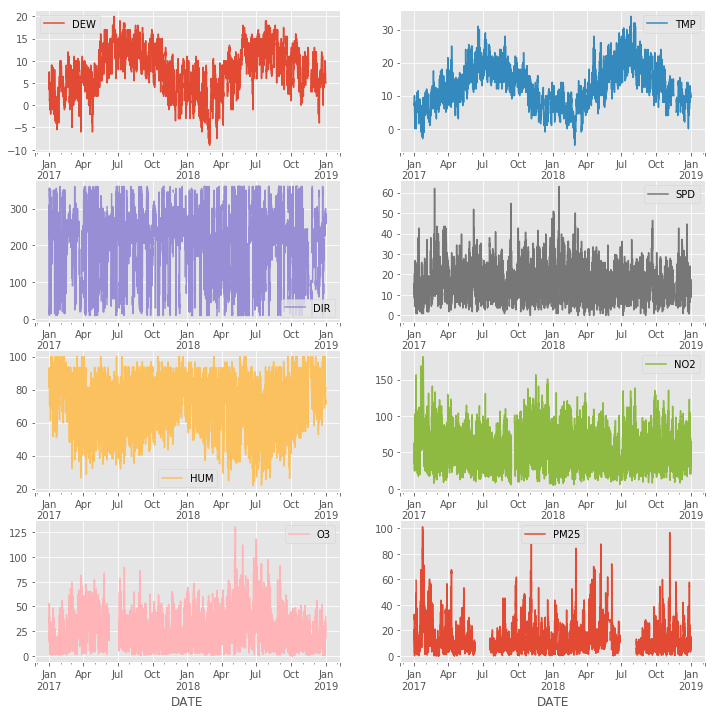

In [150]:
#Visualization after handling outliers:
data.set_index('DATE').plot(subplots=True,layout=(4,2), figsize=(12, 12),sharex=False);

In [151]:
data = final

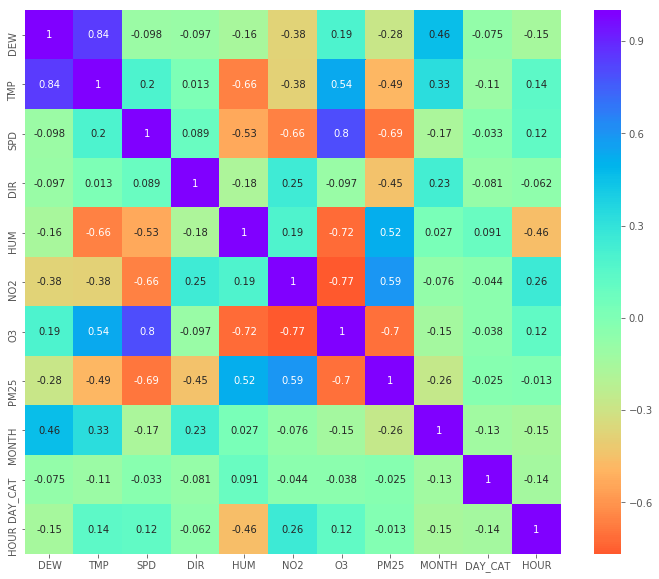

In [152]:
#Correlation_Matrix for the dataset
plt.rcParams["figure.figsize"] = [12,10]
data_corr = data[['DEW','TMP','SPD','DIR','HUM','NO2','O3','PM25','MONTH','DAY_CAT','HOUR']].corr()

corr = data_corr.corr()
sns.heatmap(corr, center=0, annot=True,cmap="rainbow_r",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

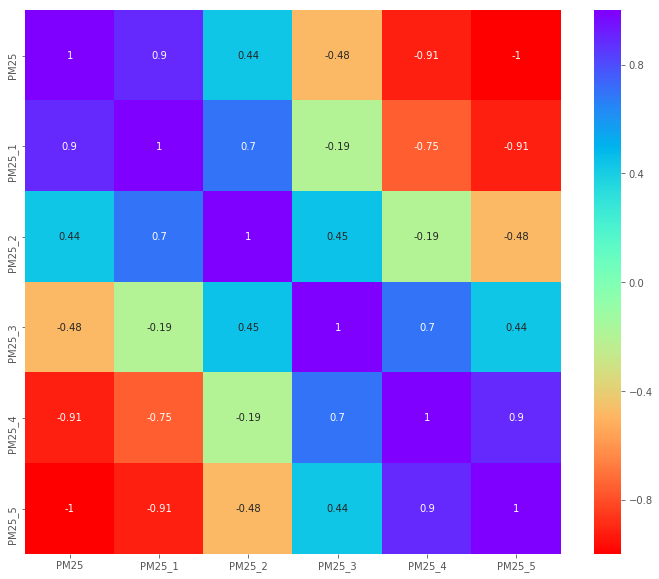

In [153]:
#Correlation_Matrix for shifted features of PM25
plt.rcParams["figure.figsize"] = [12,10]
data_corr = data[['PM25','PM25_1','PM25_2','PM25_3','PM25_4','PM25_5']].corr()

corr = data_corr.corr()
sns.heatmap(corr, center=0, annot=True,cmap="rainbow_r",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

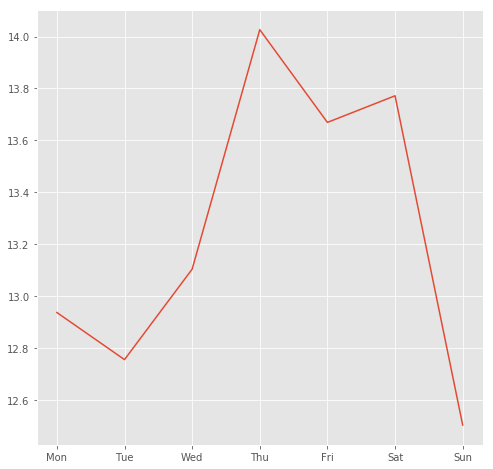

In [196]:
#Visualization of mean of features based on day of the week
plt.rcParams["figure.figsize"] = [8,8]
data['DAY_CAT'] = data['DATE'].dt.dayofweek
mean_plot_data = data[['NO2','O3','PM25','DAY_CAT']].groupby('DAY_CAT').apply(lambda x:x.mean())
matplotlib.pyplot.plot(['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'],mean_plot_data['PM25'])


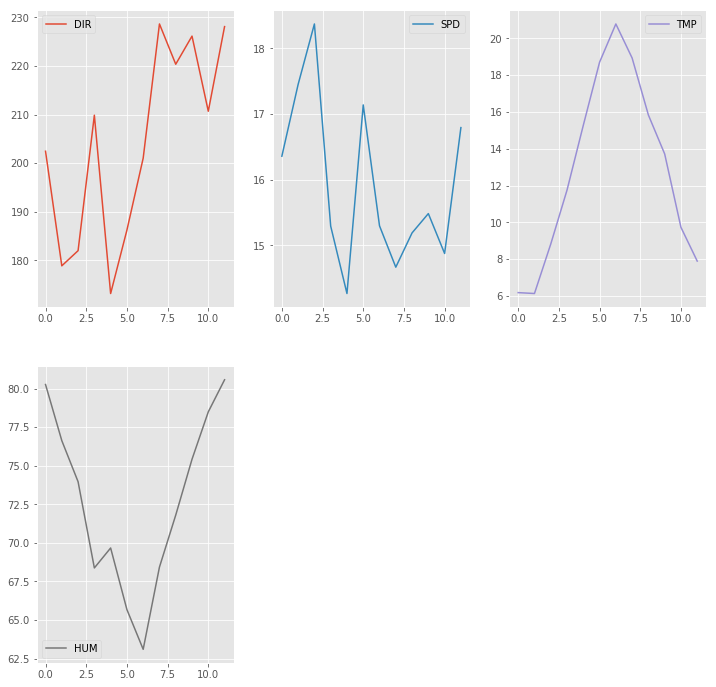

In [197]:
#Visualization of mean of features based on month of the year
mean_plot_data = data[['DIR','SPD','TMP','HUM','MONTH']].groupby('MONTH').apply(lambda x:x.mean())
mean_plot_data.drop('MONTH',axis=1).reset_index().drop('MONTH',axis=1).plot(subplots=True,layout=(2,3), figsize=(12, 12),sharex=False);


# Thresholds


| Species 	| Min   	| Max  	|
|---------	|-------	|------	|
| DEW     	| -98.2 	| 36.8 	|
| TMP     	| -93.2 	| 61.8 	|
| DIR     	| 1     	| 360  	|
| SPD     	| 0     	| 324  	|
| HUM     	| 0     	| 100  	|
| NO2     	| 0     	| 601  	|
| O3      	| 0     	| 241  	|
| PM25    	| 0     	| 71   	|